In [2]:
import pandas as pd
import seaborn as sns
passageiros = pd.read_csv("Passageiros.csv")
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


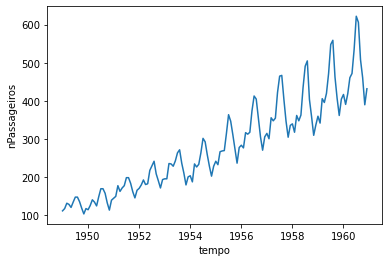

In [3]:
sns.lineplot(x="tempo",y="nPassageiros", data=passageiros)

In [5]:
Tempo = passageiros.iloc[:,:-1].values
nPassageiros = passageiros.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [7]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, test_size = 0.3)

In [9]:
regressor = linear_model.LinearRegression()

In [10]:
regressor.fit(Tempo_treino, nPassageiros_treino)

LinearRegression()

In [11]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [12]:
import numpy as np

In [13]:
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_predito})

In [14]:
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_teste})

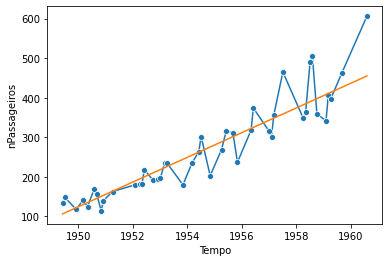

In [17]:
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito)

In [18]:
#coeficiente angular
regressor.coef_

array([31.22634016])

In [19]:
#coeficiente linear
regressor.intercept_

-60766.70582611029

In [21]:
#R2 alto = bom baixo = ruim
from sklearn.metrics import r2_score

In [22]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8438449905214831

In [24]:
#Suport Vector Machine SVM
from sklearn.svm import SVR

In [62]:
regressor_svr = SVR(C=1000)

In [63]:
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=1000)

In [64]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [65]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_predito_svr})

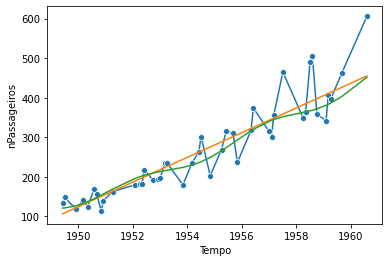

In [66]:
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito)
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito_svr)

In [67]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.8314264121670287